# Course Description
Visualizing data in plots and figures exposes the underlying patterns in the data and provides insights. Good visualizations also help you communicate your data to others, and are useful to data analysts and other consumers of the data. In this course, you will learn how to use Matplotlib, a powerful Python data visualization library. Matplotlib provides the building blocks to create rich visualizations of many different kinds of datasets. You will learn how to create visualizations for different kinds of data and how to customize, automate, and share these visualizations.

#### Credit
* Ariel Rokem
* Chester Ismay
* Amy Peterson

# Module 1. Introduction to Matplotlib
This chapter introduces the Matplotlib visualization library and demonstrates how to use it with data.

In [102]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [16]:
seattle_weather = pd.read_excel("./Datasets/seattle_weather_monthly.xlsx", engine='openpyxl')
austin_weather = pd.read_excel("./Datasets/austin_weather_monthly.xlsx", engine='openpyxl')

### Adding data to an Axes object

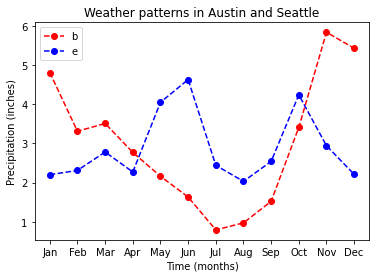

In [29]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--', color = 'r', 
        label = "Seattle")

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--', color = 'b', 
        label = "Austin")

# label the axis
ax.set_xlabel("Time (months)")
ax.set_ylabel("Precipitation (inches)")
ax.set_title("Weather patterns in Austin and Seattle")

# legend
plt.legend("best")

# Call the show function
plt.show()

### Small multiples
To reduce the complexity we can make same plot in multiple subplots.

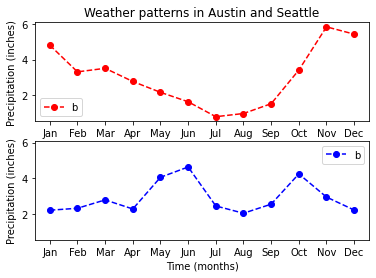

In [39]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(2, 1, sharey = True)

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--', color = 'r', 
        label = "Seattle")

# legend
ax[0].legend("best")

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--', color = 'b', 
        label = "Austin")

# legend
ax[1].legend("best")

# label the axis
ax[0].set_ylabel("Precipitation (inches)")
ax[1].set_ylabel("Precipitation (inches)")
ax[1].set_xlabel("Time (months)")
ax[0].set_title("Weather patterns in Austin and Seattle")

plt.show()

# Module 2. Plotting time-series
Time series data is data that is recorded. Visualizing this type of data helps clarify trends and illuminates relationships between data.

In [65]:
climate_change = pd.read_csv("./Datasets/climate_change.csv", parse_dates = ["date"], index_col = "date")
# climate_change["date"] = pd.to_datetime(climate_change["date"])
# climate_change = climate_change.set_index("date")
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


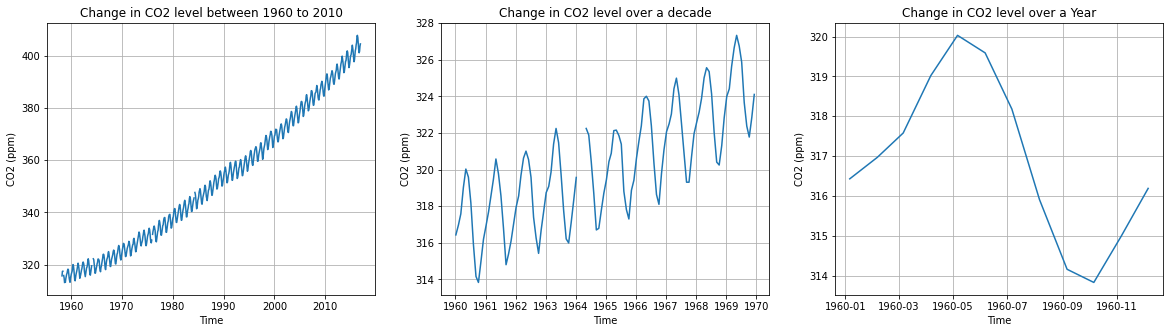

In [67]:
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)

ax[0].grid(True)
ax[0].plot(climate_change.index, climate_change["co2"])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("CO2 (ppm)")
ax[0].set_title("Change in CO2 level between 1960 to 2010")

# Zooming in on a decade
ax[1].grid(True)
sixties = climate_change["1960-01-01" : "1969-12-31"]
ax[1].plot(sixties.index, sixties["co2"])
ax[1].set_xlabel("Time")
ax[1].set_ylabel("CO2 (ppm)")
ax[1].set_title("Change in CO2 level over a decade")

# Zooming in on one year
ax[2].grid(True)
sixty = climate_change["1960-01-01" : "1960-12-31"]
ax[2].plot(sixty.index, sixty["co2"])
ax[2].set_xlabel("Time")
ax[2].set_ylabel("CO2 (ppm)")
ax[2].set_title("Change in CO2 level over a Year")

plt.show()

* CO2 level increases from January to May and then it starts decreasing till October, again then it rises.
* In general CO2 level has been increased significantly over the years.
* The presence of missing values is shown by gaps in the graph.

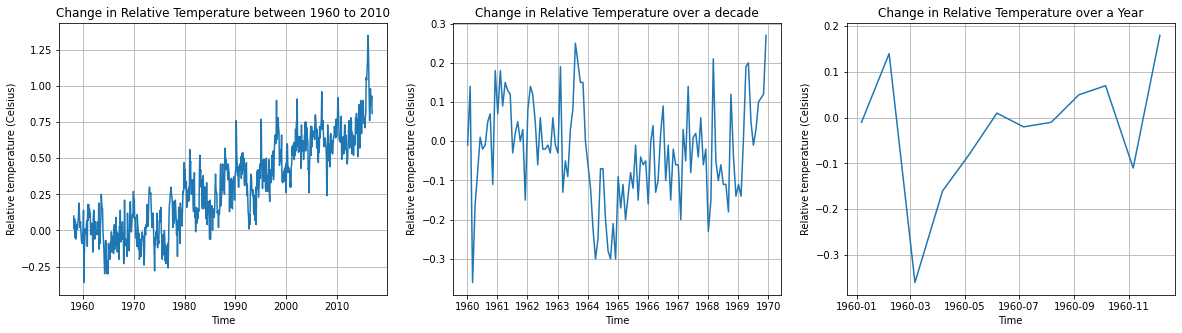

In [69]:
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)

ax[0].grid(True)
ax[0].plot(climate_change.index, climate_change["relative_temp"])
ax[0].set_xlabel("Time")
ax[0].set_ylabel('Relative temperature (Celsius)')
ax[0].set_title("Change in Relative Temperature between 1960 to 2010")

# Zooming in on a decade
ax[1].grid(True)
sixties = climate_change["1960-01-01" : "1969-12-31"]
ax[1].plot(sixties.index, sixties["relative_temp"])
ax[1].set_xlabel("Time")
ax[1].set_ylabel('Relative temperature (Celsius)')
ax[1].set_title("Change in Relative Temperature over a decade")

# Zooming in on one year
ax[2].grid(True)
sixty = climate_change["1960-01-01" : "1960-12-31"]
ax[2].plot(sixty.index, sixty["relative_temp"])
ax[2].set_xlabel("Time")
ax[2].set_ylabel('Relative temperature (Celsius)')
ax[2].set_title("Change in Relative Temperature over a Year")

plt.show()

Though there are few months where the relative temperature has gone down but in general the relative temperature has gone up over the years.

## Plotting time-series with different variables
If you want to plot two time-series variables that were recorded at the same times, you can add both of them to the same subplot.

If the variables have very different scales, you'll want to make sure that you plot them in different twin Axes objects. These objects can share one axis (for example, the time, or x-axis) while not sharing the other (the y-axis).

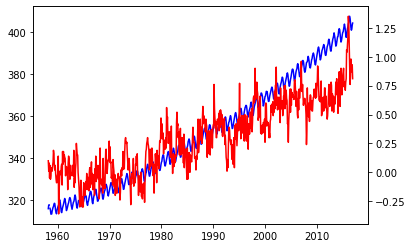

In [70]:
# Initalize a Figure and Axes
fig, ax =  plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color='red')

plt.show()

## Annotating time-series data
Annotating a plot allows us to highlight interesting information in the plot. For example, in describing the climate change dataset, we might want to point to the date at which the relative temperature first exceeded 1 degree Celsius.
### A function that plots time-series

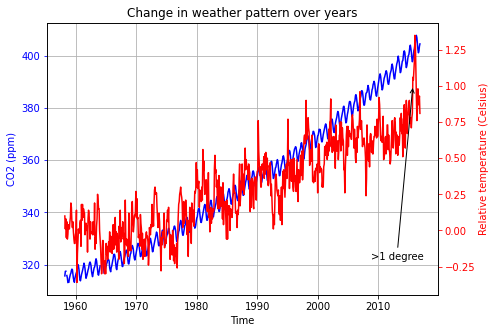

In [83]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(7)

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'CO2 (ppm)')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'],'red', 'Time', 'Relative temperature (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy = (pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), 
             arrowprops={'arrowstyle': '->', 'color': 'black'})

ax.grid(True)
ax2.set_title("Change in weather pattern over years")
plt.show()

# Module 3. Quantitative comparisons and statistical visualizations
Visualizations can be used to compare data in a quantitative manner. This chapter explains several methods for quantitative visualizations. In this chapter we will focus of quantitative comparision between the parts of data.

## Bar chart
Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

In [85]:
medals = pd.read_csv("./Datasets/medals_by_country_2016.csv", index_col = 0)
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


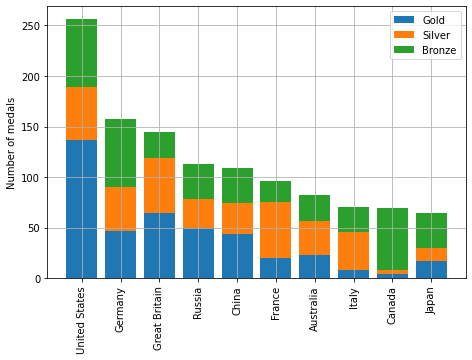

In [103]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(7.5)

# Plot a bar-chart of medals as a function of country
ax.bar(medals.index, medals["Gold"], label = "Gold")
ax.bar(medals.index, medals["Silver"], bottom = medals["Gold"], label = "Silver")
ax.bar(medals.index, medals["Bronze"], bottom = medals["Gold"] + medals["Silver"], label = "Bronze")

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index,  rotation = 90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

ax.grid(True)
ax.legend()
plt.show()

## Quantitative comparisons: histograms
### Creating histograms
It is used to compare the distribution of two variables.
<br>Histograms show the full distribution of a variable. In this exercise, we will display the distribution of weights of medalists in gymnastics and in rowing in the 2016 Olympic games for a comparison between them.</br>

In [109]:
summer2016 = pd.read_csv("./Datasets/summer2016.csv")
summer2016.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [106]:
mens_rowing = summer2016[(summer2016["Sex"] == "M") & (summer2016["Sport"] == "Rowing")]
mens_gymnastics = summer2016[(summer2016["Sex"] == "M") & (summer2016["Sport"] == "Gymnastics")]

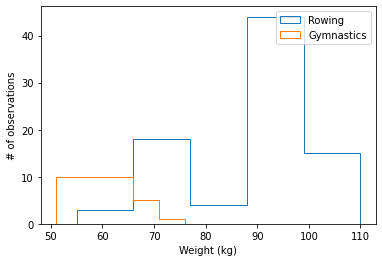

In [108]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"], label = "Rowing", bins = 5, histtype="step")

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"], label = "Gymnastics", bins = 5, histtype="step")

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

## Statistical plotting
### Adding error-bars to a bar chart

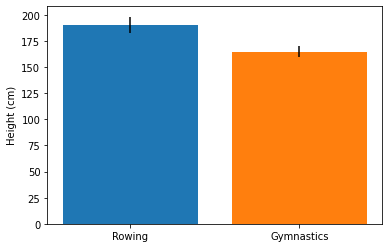

In [110]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr=mens_rowing["Height"].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr=mens_gymnastics["Height"].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

These error bars can help you see that the difference in heights is rather large in terms of the standard deviation within every group.

### Creating boxplots
Boxplots provide additional information about the distribution of the data that they represent. They tell us what the median of the distribution is, what the inter-quartile range is and also what the expected range of approximately 99% of the data should be. Outliers beyond this range are particularly highlighted.

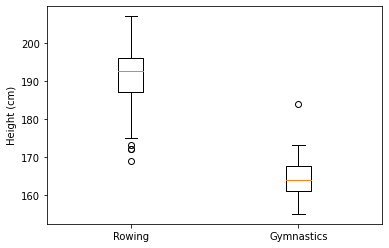

In [113]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

* There is one Gymnast who is exceptionally taller.
* There are few Rower who are exceptionally shorter

## Quantitative comparisons: scatter plots
### Simple scatter plot
Scatter are a bi-variate visualization technique. They plot each record in the data as a point.

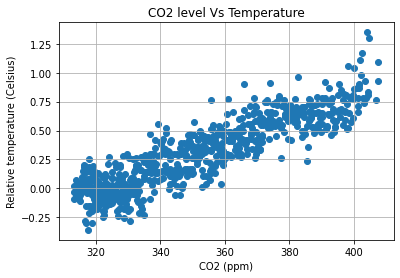

In [121]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change["co2"], climate_change["relative_temp"])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (Celsius)")

# Set the title"
ax.set_title("CO2 level Vs Temperature")

ax.grid(True)
plt.show()

There is a strong positive correlation between Temperature and CO2 level. This is nothing but Green House Effect.

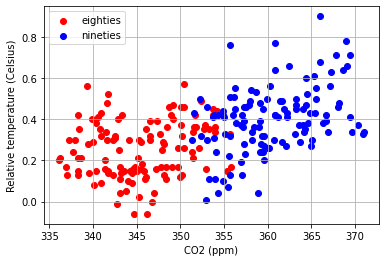

In [120]:
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]

fig, ax = plt.subplots()

ax.scatter(eighties["co2"], eighties["relative_temp"], color="red", label="eighties")
ax.scatter(nineties["co2"], nineties["relative_temp"], color="blue", label="nineties")

ax.grid(True)
ax.legend()
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()

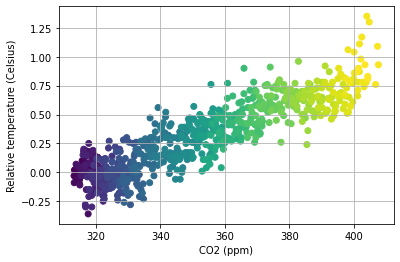

In [119]:
# Encoding a third variable by color
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

ax.grid(True)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()

# Module 4. Sharing visualizations with others
This chapter shows you how to share your visualizations with others: how to save your figures as files, how to adjust their look and feel, and how to automate their creation based on input data.

### Guidelines for choosing plotting style
* Dark backgrounds are usually less visible
* If color is important, consider choosing colorblind-friendly options
    * "seaborn-colorblind" or "tableau-colorblind10"
* If you think that someone will want to print your figure, use less ink
* If it will be printed in black-and-white, use the "grayscale" style

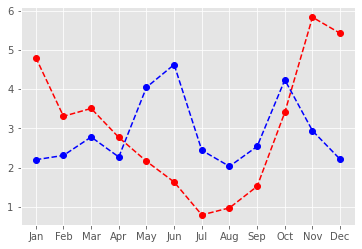

In [124]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use("ggplot")

fig, ax = plt.subplots()
# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--', color = 'r', 
        label = "Seattle")

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--', color = 'b', 
        label = "Austin")

plt.show()

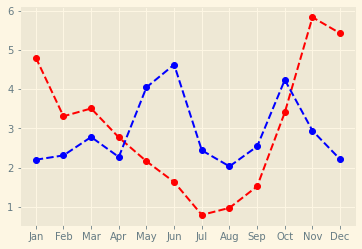

In [127]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use("Solarize_Light2")

fig, ax = plt.subplots()
# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--', color = 'r', 
        label = "Seattle")

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--', color = 'b', 
        label = "Austin")

plt.savefig("austin_weather.png")

In [129]:
# lossless compression - high resolution
plt.savefig("austin_weather.jpg")

fig.savefig("austin_weather.jpg", quality=50)
fig.savefig("austin_weather.svg")
fig.savefig("gold_medals.png", dpi=300)

<Figure size 432x288 with 0 Axes>

### Automating figures from data
One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.
#### Why automate?
* Ease and speed
* Flexibility
* Robustness
* Reproducibility

In [131]:
# Extract the "Sport" column
sports_column = summer2016["Sport"]

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


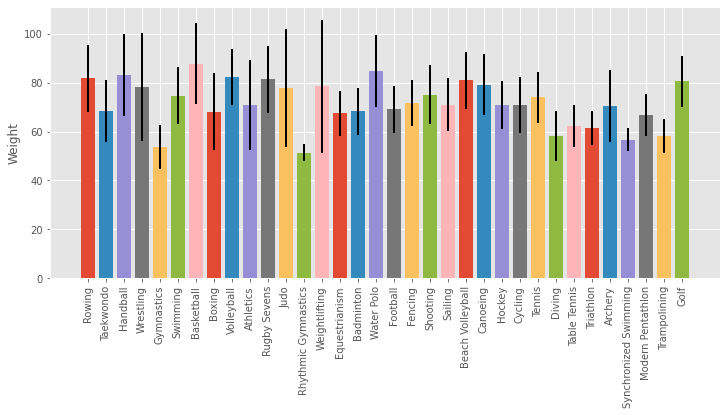

In [137]:
plt.style.use("ggplot")

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(12)

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer2016[summer2016["Sport"] == sport]
    
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(),
  yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig("sports_weights.png")